### 1. Feature/Data Transformation
       
### 2. Missing Data Imputation
       
### 3. Dimensionality Reduction
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#from feature_selector import FeatureSelector
# using RandomForestRegressor we will preditct null for the Hospital beds
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,make_scorer, mean_squared_error,mean_absolute_error
from math import sqrt

In [2]:
data = pd.read_csv('merged_data.csv',parse_dates=['timestamp'],low_memory=False)
data.head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [3]:
data.replace([np.inf,-np.inf],0,inplace=True)

### 1. Feature/Data Transformation
#### Outliers

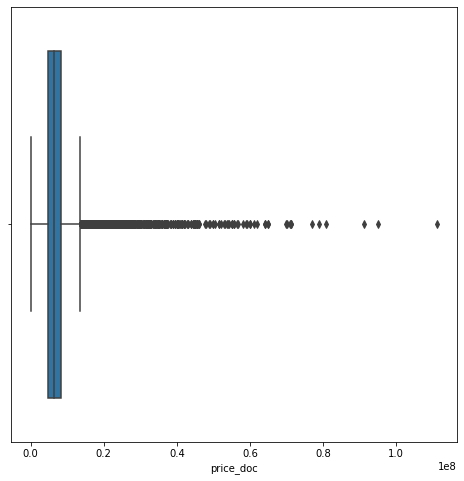

In [4]:
# for price_doc
plt.figure(figsize=(8,8))
sns.boxplot(x=data.price_doc)
plt.show()

In [5]:
data.price_doc.max()

111111112

In [6]:
data.loc[data.price_doc == data.price_doc.max()]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2118,2118,2121,2012-05-10,55,31.0,12.0,NaN,NaN,NaN,NaN,...,NaN,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2


In [7]:
data.drop([2121],inplace=True)  # Drop data with extremely big price

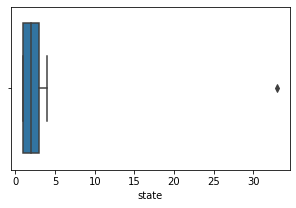

In [8]:
# for state
plt.figure(figsize=(5,3))
sns.boxplot(x=data.state)
plt.show()

In [9]:
print(data.state.max())
data.loc[data.state == data.state.max()]

33.0


,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
10089,10089,10092,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3


In [10]:
data.loc[data.state == 33, 'state'] = 3  # Replace outliers with proper value 

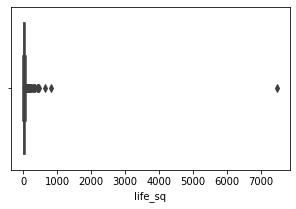

In [11]:
# for life_sq
plt.figure(figsize=(5,3))
sns.boxplot(x=data.life_sq)
plt.show()

In [12]:
print(data.life_sq.max())
data.loc[data.life_sq == data.life_sq.max()]

7478.0


,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
13546,13546,13549,2013-12-30,79,7478.0,8.0,17.0,1.0,2014.0,3.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3


In [13]:
data.life_sq.dropna().describe()

count    24087.000000
mean        34.403371
std         52.286817
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [14]:
data.drop([13549],inplace=True)  # Drop data with extremely big life_sq

In [15]:
print(data.life_sq.min())
data.loc[data.life_sq == data.life_sq.min()].shape

0.0


(45, 392)

In [16]:
data.loc[(data.full_sq.notnull()) & (data.life_sq.notnull())]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,30464,30467,2015-06-30,56,51.0,19.0,19.0,1.0,2017.0,2.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30466,30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30467,30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30469,30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


In [17]:
data['life/full'] = np.nan
data['life/full'] = round(data.life_sq/data.full_sq,2)

In [18]:
data['life/full']

0        0.63
1        0.56
2        0.67
3        0.56
4        1.00
         ... 
30466    0.61
30467    0.69
30468     NaN
30469    0.50
30470    0.65
Name: life/full, Length: 30469, dtype: float64

In [19]:
data['life/full'].dropna().describe()

count    24086.00
mean          inf
std           NaN
min          0.00
25%          0.54
50%          0.60
75%          0.67
max           inf
Name: life/full, dtype: float64

In [20]:
data[data['life/full']==np.inf]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,life/full
24296,24296,24299,2014-11-05,0,77.0,4.0,17.0,1.0,0.0,3.0,...,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8,inf


In [21]:
data.loc[data['life/full']==np.inf,'life/full'] = np.nan

In [22]:
# replace zero value with mean percent for life_sq

data.loc[(data.full_sq !=0) &(data.life_sq == 0),'life_sq'] = round(data.loc[(data.full_sq !=0) & 
                                                                             (data.life_sq == 0)].full_sq * .64)
# replace null value with mean percent for life_sq

data.loc[(data.full_sq !=0) & (data['life_sq'].isna() ),'life_sq'] = round(data.loc[(data.full_sq !=0) & 
                                                                             (data['life_sq'].isna())].full_sq * .64)

In [23]:
data['life_sq'].describe()

count    30469.000000
mean        35.118514
std         47.025279
min          0.000000
25%         22.000000
50%         31.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [24]:
data.loc[data['life_sq']==802,'life_sq'] = data.loc[data['life_sq']==802].full_sq * .64

In [25]:
data.loc[data['life_sq']==637]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,life/full
22785,22785,22788,2014-09-23,637,637.0,18.0,19.0,4.0,2016.0,2.0,...,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8,1.0


In [26]:
data.loc[data['full_sq']==0]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,life/full
17932,17932,17935,2014-04-28,0,0.0,0.0,0.0,1.0,0.0,0.0,...,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8,NaN
24296,24296,24299,2014-11-05,0,77.0,4.0,17.0,1.0,0.0,3.0,...,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8,NaN


In [27]:
data.drop(17935,inplace = True)   # drop where full_sq and life_sq have 0

In [28]:
# replace zero value with mean persnatge for full_sq
data.loc[(data.full_sq ==0) &(data.life_sq != 0),'full_sq'] = round(data.loc[(data.full_sq ==0) & 
                                                                             (data.life_sq != 0)].life_sq / .64)

In [29]:
data.drop('life/full',axis=1,inplace=True)

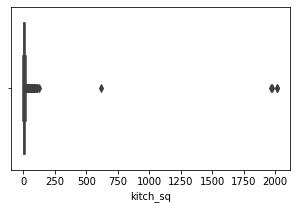

In [30]:
# for Kitch_sq
plt.figure(figsize=(5,3))
sns.boxplot(x=data.kitch_sq)
plt.show()

In [31]:
# drop 3 max outliers for kitch_sq
for i in range(0,3):
    dropindex = data.loc[data['kitch_sq'] == (data['kitch_sq'].max()) ].index
    data.drop(dropindex,inplace=True)
    i<3

In [32]:
data['kitch_sq'].describe()

count    20894.000000
mean         6.113525
std         15.104510
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       1970.000000
Name: kitch_sq, dtype: float64

In [33]:
data.loc[data['kitch_sq']==0].shape

(1381, 392)

In [34]:
data.loc[data['kitch_sq'].isnull()].shape

(9571, 392)

In [35]:
data['kitch_sq'].unique()

array([     nan, 1.10e+01, 1.20e+01, 0.00e+00, 8.00e+00, 1.00e+00,
       6.00e+00, 1.00e+01, 9.00e+00, 5.00e+00, 7.00e+00, 1.60e+01,
       1.23e+02, 1.30e+01, 1.50e+01, 7.30e+01, 3.00e+00, 1.40e+01,
       4.00e+00, 1.90e+01, 3.70e+01, 5.40e+01, 1.70e+01, 2.00e+00,
       2.10e+01, 2.00e+01, 4.10e+01, 6.30e+01, 1.80e+01, 4.00e+01,
       5.80e+01, 4.80e+01, 6.20e+02, 2.20e+01, 3.30e+01, 7.50e+01,
       4.20e+01, 1.97e+03, 3.40e+01, 2.40e+01, 3.50e+01, 3.00e+01,
       6.00e+01, 6.20e+01, 4.30e+01, 7.40e+01, 5.30e+01, 2.30e+01,
       3.20e+01, 3.10e+01, 7.80e+01, 2.90e+01, 6.50e+01, 2.60e+01,
       5.70e+01, 1.12e+02, 5.10e+01, 6.10e+01, 3.90e+01, 7.20e+01,
       6.60e+01, 2.70e+01, 2.80e+01, 4.40e+01, 3.60e+01, 2.50e+01,
       8.40e+01, 9.50e+01, 8.60e+01, 9.60e+01, 9.70e+01, 7.90e+01])

In [36]:
data.loc[(data['kitch_sq']!=data['full_sq']) & (data['life_sq'] < data['kitch_sq'] )
        & (data['kitch_sq']+data['life_sq'] > data['full_sq'])]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
8056,8056,8059,2013-05-21,11.0,11.0,2.0,5.0,2.0,1907.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
9172,9172,9175,2013-07-12,37.0,19.0,9.0,10.0,1.0,2006.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
10048,10048,10051,2013-08-24,38.0,20.0,13.0,16.0,1.0,1983.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
11520,11520,11523,2013-10-24,38.0,23.0,11.0,14.0,5.0,1971.0,2.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
12245,12245,12248,2013-11-18,22.0,14.0,3.0,5.0,2.0,1970.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
13117,13117,13120,2013-12-14,31.0,19.0,5.0,1.0,1.0,NaN,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
18404,18404,18407,2014-05-14,67.0,47.0,5.0,6.0,2.0,1929.0,3.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
22137,22137,22140,2014-09-02,75.0,43.0,11.0,16.0,1.0,1986.0,3.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
23216,23216,23219,2014-10-02,43.0,29.0,5.0,5.0,2.0,1962.0,2.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
26236,26236,26239,2014-12-11,34.0,16.0,2.0,17.0,2.0,2016.0,1.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8


In [37]:
# drop 11 records where records were in correct 
dropindex = data.loc[(data['kitch_sq']!=data['full_sq']) & (data['life_sq'] < data['kitch_sq'] )
        & (data['kitch_sq']+data['life_sq'] > data['full_sq'])].index
data.drop(dropindex,inplace=True)

In [38]:
data.loc[(data['full_sq']==data['kitch_sq']) & (data['full_sq']==data['life_sq'])].shape

(44, 392)

In [39]:
# drop 42 records where full_sq, life_sq and kitch_sq have same record
dropindex = data.loc[(data['full_sq']==data['kitch_sq']) & (data['full_sq']==data['life_sq'])].index
data.drop(dropindex,inplace=True)

In [40]:
data['kitch_sq'].dropna().describe()

count    20837.000000
mean         5.904161
std          4.375327
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         79.000000
Name: kitch_sq, dtype: float64

In [41]:
# replace 0 and null value with 6 in kitchen
data.loc[(data['kitch_sq'].isnull()),'kitch_sq'] = 6
data.loc[(data['kitch_sq']==0),'kitch_sq'] = 6

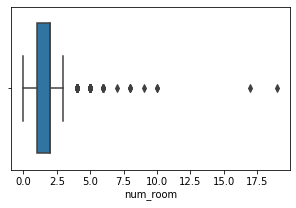

In [42]:
# for num_room
plt.figure(figsize=(5,3))
sns.boxplot(x=data.num_room)
plt.show()

In [43]:
data.num_room.unique()

array([nan,  2.,  3.,  1.,  4.,  5.,  6.,  0., 19., 10.,  8.,  7., 17.,
        9.])

In [44]:
Counter(data.num_room.dropna())

Counter({2.0: 8121,
         3.0: 4665,
         1.0: 7563,
         4.0: 417,
         5.0: 40,
         6.0: 9,
         0.0: 13,
         19.0: 1,
         10.0: 2,
         8.0: 3,
         7.0: 1,
         17.0: 1,
         9.0: 1})

In [45]:
data.num_room.describe().dropna()

count    20837.000000
mean         1.910928
std          0.851598
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

In [46]:
# replace 0, null and no of room > 6 to mean of no room
data.loc[(data['num_room']>6) | (data['num_room']==0) | (data.num_room.isnull()) ,'num_room'] = round(np.mean(data.num_room.dropna()))

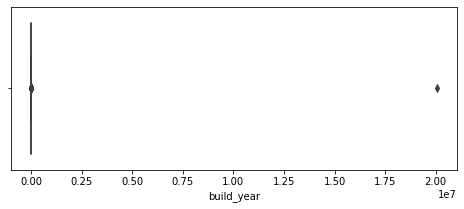

In [47]:
# for build_year
plt.figure(figsize=(8,3))
sns.boxplot(x=data.build_year)
plt.show()

In [48]:
print(data.build_year.max())
print(data.build_year.min())

20052009.0
0.0


In [49]:
data.loc[data['build_year'] == data.build_year.max(), 'build_year'] = 2007

In [50]:
Counter(data.build_year.dropna())

Counter({1980.0: 226,
         2014.0: 909,
         1970.0: 417,
         1982.0: 189,
         2013.0: 462,
         2004.0: 220,
         2003.0: 193,
         1957.0: 119,
         1986.0: 130,
         1960.0: 344,
         1995.0: 149,
         1979.0: 236,
         1975.0: 309,
         1987.0: 171,
         1962.0: 337,
         1969.0: 406,
         1993.0: 115,
         1996.0: 162,
         1972.0: 359,
         2011.0: 162,
         1965.0: 378,
         2010.0: 132,
         1985.0: 178,
         2006.0: 241,
         1961.0: 297,
         1971.0: 351,
         1978.0: 234,
         1966.0: 348,
         1967.0: 384,
         2000.0: 130,
         1964.0: 315,
         1977.0: 259,
         1983.0: 184,
         1968.0: 389,
         1974.0: 357,
         2008.0: 234,
         1959.0: 208,
         2007.0: 220,
         1984.0: 169,
         1976.0: 263,
         1997.0: 139,
         1989.0: 155,
         1958.0: 179,
         1988.0: 155,
         2012.0: 233,
         1

In [51]:
data.loc[data['build_year'].isnull()].shape

(13601, 392)

In [52]:
print(data.loc[data['build_year']<1800].shape)
print(data.loc[data['build_year']>2019].shape)

(887, 392)
(1, 392)


In [53]:
np.median(data['build_year'].dropna())

1979.0

In [54]:
data.loc[(data['build_year']<1800) | (data['build_year']>2019),'build_year'] = np.median(data['build_year'].dropna())

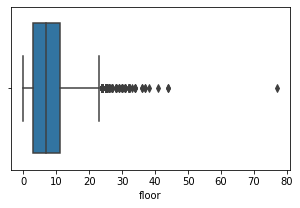

In [55]:
# for floor
plt.figure(figsize=(5,3))
sns.boxplot(x=data.floor)
plt.show()

In [56]:
print(data.floor.max())
data.loc[data.floor == data.floor.max()]

77.0


,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
23584,23584,23587,2014-10-15,57.0,33.0,77.0,22.0,1.0,1986.0,2.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8


In [57]:
data.drop(23587,inplace=True)

In [58]:
data.floor.unique()

array([ 4.,  3.,  2.,  9., 14., 10.,  5., 12., 11., 15.,  7.,  6., 24.,
        1.,  8., 16., 17., 13., 20., 18., nan, 21., 23., 19., 22., 26.,
       25., 29., 32., 27., 30., 44.,  0., 28., 38., 34., 33., 37., 31.,
       36., 41., 77.])

In [59]:
data.loc[data['floor'].isnull()].shape

(167, 392)

In [60]:
data.loc[(data['floor'].isnull()) & (data['max_floor'].isnull())].shape

(167, 392)

In [61]:
dropindex = data.loc[(data['floor'].isnull()) & (data['max_floor'].isnull())].index
data.drop(dropindex,inplace=True)

In [62]:
data.loc[(data['floor']==0) & (data['max_floor'].isnull())]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
5085,5085,5088,2012-12-04,157.0,75.0,0.0,NaN,NaN,NaN,2.0,...,NaN,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
5333,5333,5336,2012-12-18,181.0,79.0,0.0,NaN,NaN,NaN,2.0,...,NaN,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2


In [63]:
data.loc[(data['floor']==0) & (data['max_floor'].isnull()),'max_floor'] = 0.0

In [64]:
data.max_floor.unique()

array([ nan,   0.,  17.,  22.,  16.,   9.,   8.,  24.,   1.,   5.,   6.,
        10.,  25.,  14.,  12.,  18.,  23.,  20.,   7.,   4.,  30.,  11.,
         3.,  40.,   2.,  32.,  15.,  27.,  21.,  19.,  28.,  29.,  13.,
        39.,  38.,  31.,  26.,  37.,  33.,  47.,  36.,  34.,  48.,  42.,
        45.,  99.,  57.,  44., 117.,  41.])

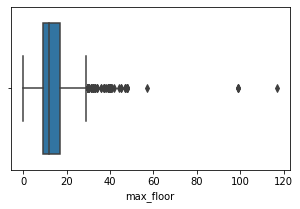

In [65]:
# for max_floor
plt.figure(figsize=(5,3))
sns.boxplot(x=data.max_floor)
plt.show()

In [66]:
# drop 3 high outliers
for i in range(0,3):
    data.drop(data.loc[data['max_floor'] == data['max_floor'].max()].index,inplace=True)
    i<3

In [67]:
data.loc[data['max_floor']>30].shape

(79, 392)

In [68]:
data.loc[data['max_floor'].isnull()]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,2.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,2.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,2.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,2.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,2.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10290,10293,2013-09-05,47.0,30.0,2.0,NaN,NaN,NaN,2.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.70,76.20,46352.0,226047.3
10304,10304,10307,2013-09-05,65.0,60.0,4.0,NaN,NaN,NaN,2.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.70,76.20,46352.0,226047.3
10328,10328,10331,2013-09-06,37.0,24.0,14.0,NaN,NaN,NaN,2.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.70,76.20,46352.0,226047.3
10389,10389,10392,2013-09-10,38.0,24.0,15.0,NaN,NaN,NaN,2.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.70,76.20,46352.0,226047.3


In [69]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [70]:
def null_value():
    null_values_per = data.isnull().sum() * 100/ len(data)
    missing_values = pd.DataFrame({
                                'Columns Name' : data.columns,
                                'Null Value Percentage' : null_values_per})
    missing_values.sort_values('Null Value Percentage',ascending=False,inplace = True)
    return(missing_values)



In [71]:
missing_values_new = null_value() 
missing_values_new[missing_values_new['Null Value Percentage']>70]

,Columns Name,Null Value Percentage
provision_retail_space_modern_sqm,provision_retail_space_modern_sqm,97.549198
provision_retail_space_sqm,provision_retail_space_sqm,81.786010


In [72]:
# drop feature morethan 70%
data.drop(['provision_retail_space_modern_sqm','provision_retail_space_sqm'],axis=1,inplace=True)

In [73]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']<10) & 
                                  (missing_values_new['Null Value Percentage']>0) ]
miss_col

,Columns Name,Null Value Percentage
cafe_avg_price_2000,cafe_avg_price_2000,5.652390
cafe_sum_2000_max_price_avg,cafe_sum_2000_max_price_avg,5.652390
cafe_sum_2000_min_price_avg,cafe_sum_2000_min_price_avg,5.652390
cafe_avg_price_3000,cafe_avg_price_3000,3.231354
cafe_sum_3000_min_price_avg,cafe_sum_3000_min_price_avg,3.231354
cafe_sum_3000_max_price_avg,cafe_sum_3000_max_price_avg,3.231354
cafe_avg_price_5000,cafe_avg_price_5000,0.969076
cafe_sum_5000_max_price_avg,cafe_sum_5000_max_price_avg,0.969076
cafe_sum_5000_min_price_avg,cafe_sum_5000_min_price_avg,0.969076
prom_part_5000,prom_part_5000,0.585414


In [74]:
for i in miss_col['Columns Name']:
    print(data[i].unique(),i,'\n')

[ 828.57  942.86  770.45 ... 1111.59 1110.88 1059.04] cafe_avg_price_2000 

[1042.86 1190.48  977.27 ... 1391.3  1384.35 1321.69] cafe_sum_2000_max_price_avg 

[614.29 695.24 563.64 ... 837.41 796.39 704.69] cafe_sum_2000_min_price_avg 

[ 859.52  858.62  944.87 ...  791.07 1186.24  917.13] cafe_avg_price_3000 

[639.68 631.03 697.44 ... 847.09 582.14 895.84] cafe_sum_3000_min_price_avg 

[1079.37 1086.21 1192.31 ... 1398.54 1516.67 1476.65] cafe_sum_3000_max_price_avg 

[ 947.14  911.31  949.55 ...  870.28 1175.16  942.92] cafe_avg_price_5000 

[1185.71 1148.81 1196.43 ... 1424.16 1462.88 1182.65] cafe_sum_5000_max_price_avg 

[708.57 673.81 702.68 ... 650.94 887.43 703.2 ] cafe_sum_5000_min_price_avg 

[13.31 27.47 21.58 ... 23.11 24.93  1.64] prom_part_5000 

[13.57511887  7.62063041 17.3515154  ... 14.47353288  9.37460879
 24.567748  ] metro_min_walk 

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.

In [75]:
# replace all null value with mean extct 'ID_railroad_station_walk' as this is continues records
for i in miss_col.loc[miss_col['Columns Name']!='ID_railroad_station_walk','Columns Name']:
    data[i].fillna(data[i].mean(),inplace=True)
data['ID_railroad_station_walk'].ffill(inplace=True)

In [76]:
missing_values_new = null_value() 
miss_col = missing_values_new[missing_values_new['Null Value Percentage']>50]
miss_col

,Columns Name,Null Value Percentage
load_of_teachers_preschool_per_teacher,load_of_teachers_preschool_per_teacher,55.71027
students_reg_sports_share,students_reg_sports_share,55.71027
theaters_viewers_per_1000_cap,theaters_viewers_per_1000_cap,55.71027
museum_visitis_per_100_cap,museum_visitis_per_100_cap,55.71027


In [77]:
data['load_of_teachers_preschool_per_teacher'].median()

863.3947939

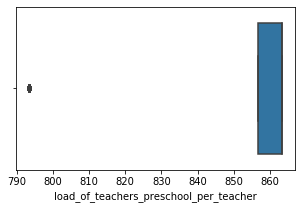

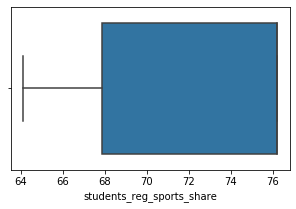

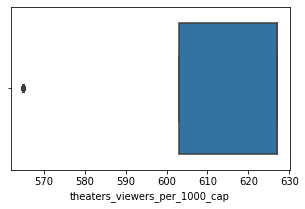

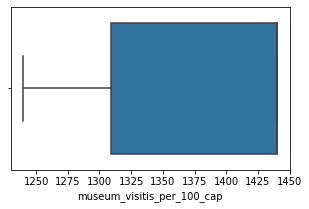

In [78]:
for i in miss_col['Columns Name']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[i])
    plt.show()

In [79]:
# drop outliers
data.drop(data.loc[data['load_of_teachers_preschool_per_teacher']<800].index,inplace=True)
data.drop(data.loc[data['theaters_viewers_per_1000_cap']<570].index,inplace=True)

In [80]:
for i in miss_col['Columns Name']:
    print(data[i].unique(),i,'\n')
    print(Counter(data[i].dropna()),'\n')

[856.7305467 863.3947939         nan] load_of_teachers_preschool_per_teacher 

Counter({863.3947939: 7884, 856.7305467: 4766}) 

[67.85 76.2    nan] students_reg_sports_share 

Counter({76.2: 7884, 67.85: 4766}) 

[603. 627.  nan] theaters_viewers_per_1000_cap 

Counter({627.0: 7884, 603.0: 4766}) 

[1309. 1440.   nan] museum_visitis_per_100_cap 

Counter({1440.0: 7884, 1309.0: 4766}) 



In [81]:
# fill na  by medain
for i in miss_col['Columns Name']:
    data[i].fillna(data[i].median(),inplace=True)

In [82]:
missing_values_new = null_value() 
miss_col = missing_values_new[missing_values_new['Null Value Percentage']>40]
miss_col

,Columns Name,Null Value Percentage
hospital_beds_raion,hospital_beds_raion,47.494406
cafe_sum_500_min_price_avg,cafe_sum_500_min_price_avg,43.873330
cafe_sum_500_max_price_avg,cafe_sum_500_max_price_avg,43.873330
cafe_avg_price_500,cafe_avg_price_500,43.873330
build_year,build_year,43.022310
state,state,42.873127


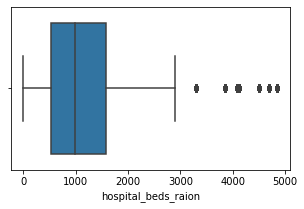

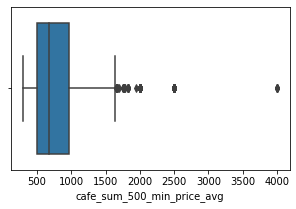

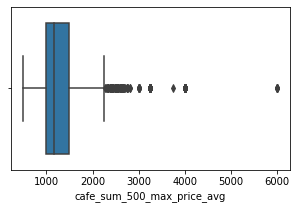

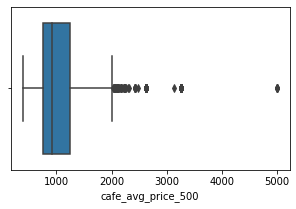

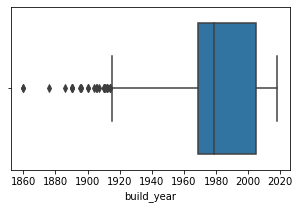

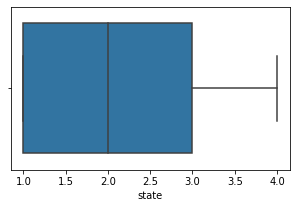

In [83]:
for i in miss_col['Columns Name']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[i])
    plt.show()

In [84]:
# drop outliers
data.drop(data.loc[data['hospital_beds_raion']>4000].index,inplace=True)
data.drop(data.loc[data['cafe_avg_price_500']>3000].index,inplace=True)
data.drop(data.loc[data['cafe_sum_500_max_price_avg']>4000].index,inplace=True)
data.drop(data.loc[data['cafe_sum_500_min_price_avg']>2500].index,inplace=True)

In [85]:
print(data['build_year'].max())
data.loc[data['build_year'] == data['build_year'].max(), 'build_year'] = 2007

2018.0


In [86]:
data['state'].max()
data.loc[data['state'] == data['state'].max(), 'state'] = 3

In [87]:
for i in miss_col['Columns Name']:
    print(data[i].unique(),i,'\n')
    print(data[i].isnull().sum(),i,'\n')
    print(Counter(data[i].dropna()),i,'\n')

[ 770. 1340. 2300.   nan  240. 1937. 2672.  920.  900.  705. 2301. 1575.
 1322.  320.  990. 1548. 1786. 1970. 1015.   30. 1145. 3855.  325. 1183.
  176.  350.  810.  730. 2857. 2890.   80.   32.  145.  750. 2078.  540.
 1036.  628.  645. 3300. 2729.  165.  125. 1450. 2715. 1020. 2643.  370.
   46. 1406. 1894. 1046. 2620. 1084. 1308.  562.  830.  262. 1130.  100.
  200.  800. 2500.  520.  620. 1940.  192. 1994.  229. 1430.   75. 1815.
 1547.   35.    0.] hospital_beds_raion 

13988 hospital_beds_raion 

Counter({540.0: 1601, 30.0: 933, 1046.0: 669, 2300.0: 422, 750.0: 414, 1084.0: 402, 240.0: 364, 229.0: 316, 1183.0: 289, 1406.0: 285, 645.0: 284, 125.0: 283, 1145.0: 276, 1322.0: 257, 2672.0: 251, 1970.0: 251, 990.0: 240, 1548.0: 231, 325.0: 218, 176.0: 218, 350.0: 214, 1937.0: 210, 830.0: 206, 2078.0: 203, 1015.0: 192, 1894.0: 192, 900.0: 190, 2857.0: 183, 730.0: 182, 1940.0: 181, 2620.0: 177, 3300.0: 176, 1036.0: 172, 145.0: 167, 2301.0: 165, 1130.0: 164, 165.0: 157, 262.0: 155, 1340.0

In [88]:
# For 'hospital_beds_raion'
data.loc[(data['hospital_beds_raion'].notnull()),['full_all','hospital_beds_raion']]


,full_all,hospital_beds_raion
753,1359171,770.0
754,57107,1340.0
755,178264,2300.0
758,178264,2300.0
759,132349,240.0
...,...,...
30464,37502,192.0
30465,116742,1046.0
30467,116742,1046.0
30469,83844,3300.0


In [89]:
print(np.mean(data.hospital_beds_raion.dropna()))

1065.2278166173703


In [90]:
data.loc[data.healthcare_centers_raion == 0,['sub_area','full_all','healthcare_centers_raion','hospital_beds_raion']]

,sub_area,full_all,healthcare_centers_raion,hospital_beds_raion
763,Zjuzino,76670,0,2672.0
764,Kurkino,942118,0,920.0
770,Kotlovka,153248,0,NaN
778,Severnoe Izmajlovo,139322,0,NaN
780,Ochakovo-Matveevskoe,111023,0,990.0
...,...,...,...,...
30451,Poselenie Novofedorovskoe,8384,0,NaN
30452,Ochakovo-Matveevskoe,111023,0,990.0
30455,Poselenie Vnukovskoe,17790,0,NaN
30458,Poselenie Moskovskij,7341,0,NaN


In [91]:
data.sub_area.nunique()

141

In [92]:
data.sub_area.unique()

array(['Alekseevskoe', 'Timirjazevskoe', 'Jasenevo', 'Bogorodskoe',
       "Altuf'evskoe", 'Novo-Peredelkino', 'Severnoe Medvedkovo',
       'Caricyno', 'Zjuzino', 'Kurkino', 'Mozhajskoe', 'Filevskij Park',
       'Taganskoe', 'Juzhnoe Butovo', 'Kotlovka', 'Lefortovo',
       "Krasnosel'skoe", 'Mitino', 'Lianozovo', 'Vyhino-Zhulebino',
       'Jaroslavskoe', 'Severnoe Izmajlovo', "Kuz'minki",
       'Ochakovo-Matveevskoe', 'Perovo', 'Nizhegorodskoe', 'Jakimanka',
       'Ivanovskoe', 'Horoshevo-Mnevniki', 'Novogireevo', 'Krjukovo',
       'Severnoe Tushino', 'Nagatino-Sadovniki', 'Golovinskoe', "Mar'ino",
       "Tekstil'shhiki", 'Ramenki', 'Bibirevo', 'Matushkino', "Kon'kovo",
       'Zjablikovo', 'Pechatniki', 'Sokolinaja Gora', 'Meshhanskoe',
       'Juzhnoe Medvedkovo', 'Chertanovo Severnoe', 'Rjazanskij',
       'Chertanovo Juzhnoe', 'Danilovskoe', 'Severnoe', 'Otradnoe',
       'Butyrskoe', 'Hovrino', 'Solncevo', 'Vostochnoe Degunino',
       'Veshnjaki', 'Birjulevo Zapadnoe', "C

In [93]:
data[data.healthcare_centers_raion == 0].sub_area.nunique()

54

In [94]:
# data[data.healthcare_centers_raion != 0].groupby('sub_area')['healthcare_centers_raion'].median()

In [95]:
hbr = data.loc[data['hospital_beds_raion'].notnull(),['sub_area','full_all','healthcare_centers_raion','hospital_beds_raion']]
null_hbr = data.loc[data['hospital_beds_raion'].isnull(),['sub_area','full_all','healthcare_centers_raion','hospital_beds_raion']]

In [96]:
# using RandomForestRegressor we will preditct null for the Hospital beds
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,make_scorer, mean_squared_error,mean_absolute_error
from math import sqrt

enc = LabelEncoder()
hbr.sub_area = enc.fit_transform(hbr.sub_area)
null_hbr.sub_area = enc.fit_transform(null_hbr.sub_area)
test = null_hbr.loc[:,['sub_area','full_all','healthcare_centers_raion']]

X = hbr.loc[:,['sub_area','full_all','healthcare_centers_raion']]
y = hbr['hospital_beds_raion']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('r2 score:', r2_score(y_test,y_predict))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_predict))) 

r2 score: 0.9999657986525906
Mean Absolute Error: 0.08367840817424038
Root Mean Squared Error: 5.103010937066822


C:\Users\DS7_CSepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [97]:
pre = pd.DataFrame(model.predict(test))
# update null values in 'hospital_beds_raion' null_hbr
null_hbr['hospital_beds_raion'] = pre.values
print(len(pre))
print(len(null_hbr))
null_hbr.head()

13988
13988


,sub_area,full_all,healthcare_centers_raion,hospital_beds_raion
756,2,1452550,1,624.4
757,0,78418,1,2380.8
761,53,60315,1,184.9
769,13,102618,1,2145.8
770,16,153248,0,1970.0


In [98]:
# update Null value with Predict values
data.loc[data['hospital_beds_raion'].isnull(),'hospital_beds_raion']= null_hbr['hospital_beds_raion'].values

In [99]:
data.hospital_beds_raion.isnull().sum()

0

In [100]:
# for year
print(data.build_year.isnull().sum())
print(np.mean(data.build_year.dropna()))
print(np.median(data.build_year.dropna()))

12508
1985.4652115431645
1980.0


In [101]:
# replace null by median
data['build_year'].fillna(np.median(data.build_year.dropna()),inplace=True)

In [102]:
# for cafe_avg_price_500
print(np.mean(data.cafe_avg_price_500.dropna()))
print(np.median(data.cafe_avg_price_500.dropna()))

985.8492402451133
914.645


In [103]:
# replace null by mean
data['cafe_avg_price_500'].fillna(np.mean(data.cafe_avg_price_500.dropna()),inplace=True)

In [104]:
# for cafe_sum_500_max_price_avg and cafe_sum_500_min_price_avg
print('cafe_sum_500_max_price_avg',np.mean(data.cafe_sum_500_max_price_avg.dropna()))
print('cafe_sum_500_min_price_avg',np.mean(data.cafe_sum_500_min_price_avg.dropna()))

cafe_sum_500_max_price_avg 1237.0179352175946
cafe_sum_500_min_price_avg 734.6803001500707


In [105]:
# replace null by mean
data['cafe_sum_500_max_price_avg'].fillna(np.mean(data.cafe_sum_500_max_price_avg.dropna()),inplace=True)
data['cafe_sum_500_min_price_avg'].fillna(np.mean(data.cafe_sum_500_min_price_avg.dropna()),inplace=True)

In [106]:
missing_values_new = null_value() 
miss_col = missing_values_new[missing_values_new['Null Value Percentage']>40]
miss_col

,Columns Name,Null Value Percentage
state,state,43.06056


In [107]:
name = data.sub_area.unique()
a = data.groupby(['sub_area'])['state'].median()
for i in name:
    data.loc[ (data['sub_area'] == i) & (data['state'].isnull()),'state' ] = a[i]

In [108]:
data.sub_area.unique()

array(['Alekseevskoe', 'Timirjazevskoe', 'Jasenevo', 'Bogorodskoe',
       "Altuf'evskoe", 'Novo-Peredelkino', 'Severnoe Medvedkovo',
       'Caricyno', 'Zjuzino', 'Kurkino', 'Mozhajskoe', 'Filevskij Park',
       'Taganskoe', 'Juzhnoe Butovo', 'Kotlovka', 'Lefortovo',
       "Krasnosel'skoe", 'Mitino', 'Lianozovo', 'Vyhino-Zhulebino',
       'Jaroslavskoe', 'Severnoe Izmajlovo', "Kuz'minki",
       'Ochakovo-Matveevskoe', 'Perovo', 'Nizhegorodskoe', 'Jakimanka',
       'Ivanovskoe', 'Horoshevo-Mnevniki', 'Novogireevo', 'Krjukovo',
       'Severnoe Tushino', 'Nagatino-Sadovniki', 'Golovinskoe', "Mar'ino",
       "Tekstil'shhiki", 'Ramenki', 'Bibirevo', 'Matushkino', "Kon'kovo",
       'Zjablikovo', 'Pechatniki', 'Sokolinaja Gora', 'Meshhanskoe',
       'Juzhnoe Medvedkovo', 'Chertanovo Severnoe', 'Rjazanskij',
       'Chertanovo Juzhnoe', 'Danilovskoe', 'Severnoe', 'Otradnoe',
       'Butyrskoe', 'Hovrino', 'Solncevo', 'Vostochnoe Degunino',
       'Veshnjaki', 'Birjulevo Zapadnoe', "C

In [109]:
Counter(data.state)

Counter({2.0: 10359, 3.0: 7849, 2.5: 103, 1.0: 10552, nan: 1})

In [110]:
data.loc[data['state']==2.5,['sub_area','state']].sub_area.unique()

array(['Zjablikovo', 'Severnoe', 'Novokosino'], dtype=object)

In [111]:
for i in ['Zjablikovo', 'Severnoe', 'Novokosino']:
    print(Counter(data.loc[data['sub_area']==i,'state']),i,'\n')

Counter({2.5: 52, 2.0: 37, 3.0: 37}) Zjablikovo 

Counter({2.5: 19, 3.0: 9, 2.0: 6, 1.0: 3}) Severnoe 

Counter({3.0: 49, 2.0: 48, 2.5: 32, 1.0: 1}) Novokosino 



In [112]:
# drop sub area with multiple state
for i in ['Zjablikovo', 'Severnoe', 'Novokosino']:
    data.drop(data.loc[data['sub_area']==i].index,inplace=True)

In [113]:
data.sub_area.unique()

array(['Alekseevskoe', 'Timirjazevskoe', 'Jasenevo', 'Bogorodskoe',
       "Altuf'evskoe", 'Novo-Peredelkino', 'Severnoe Medvedkovo',
       'Caricyno', 'Zjuzino', 'Kurkino', 'Mozhajskoe', 'Filevskij Park',
       'Taganskoe', 'Juzhnoe Butovo', 'Kotlovka', 'Lefortovo',
       "Krasnosel'skoe", 'Mitino', 'Lianozovo', 'Vyhino-Zhulebino',
       'Jaroslavskoe', 'Severnoe Izmajlovo', "Kuz'minki",
       'Ochakovo-Matveevskoe', 'Perovo', 'Nizhegorodskoe', 'Jakimanka',
       'Ivanovskoe', 'Horoshevo-Mnevniki', 'Novogireevo', 'Krjukovo',
       'Severnoe Tushino', 'Nagatino-Sadovniki', 'Golovinskoe', "Mar'ino",
       "Tekstil'shhiki", 'Ramenki', 'Bibirevo', 'Matushkino', "Kon'kovo",
       'Pechatniki', 'Sokolinaja Gora', 'Meshhanskoe',
       'Juzhnoe Medvedkovo', 'Chertanovo Severnoe', 'Rjazanskij',
       'Chertanovo Juzhnoe', 'Danilovskoe', 'Otradnoe', 'Butyrskoe',
       'Hovrino', 'Solncevo', 'Vostochnoe Degunino', 'Veshnjaki',
       'Birjulevo Zapadnoe', "Chertanovo Central'noe", 'N

In [114]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']<30) & (missing_values_new['Null Value Percentage']>20)]
miss_col

,Columns Name,Null Value Percentage
material,material,29.456442
max_floor,max_floor,29.449442
preschool_quota,preschool_quota,23.002345
school_quota,school_quota,22.991845
cafe_avg_price_1000,cafe_avg_price_1000,22.270834
cafe_sum_1000_max_price_avg,cafe_sum_1000_max_price_avg,22.270834
cafe_sum_1000_min_price_avg,cafe_sum_1000_min_price_avg,22.270834


In [115]:
'cafe_avg_price_1000', 'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg'

('cafe_avg_price_1000',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg')

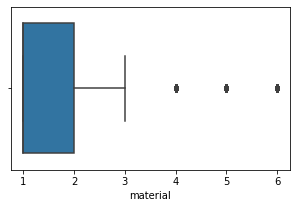

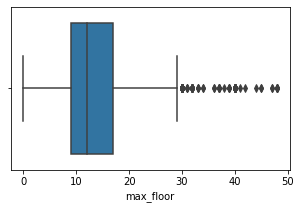

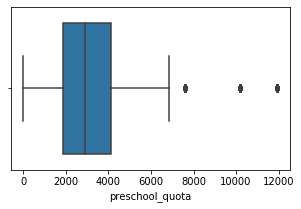

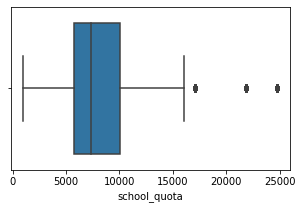

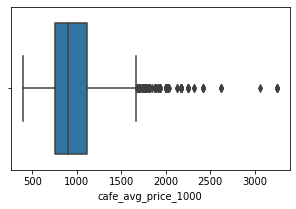

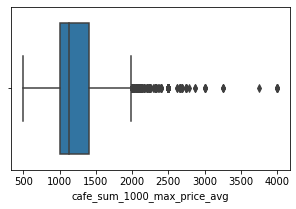

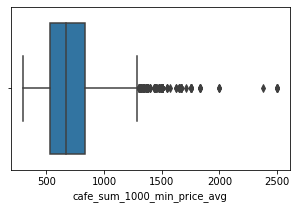

In [116]:
for i in miss_col['Columns Name']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[i])
    plt.show()

In [117]:
for i in miss_col['Columns Name']:
    print(data[i].unique(),i,'\n')
    print('Null value',data[i].isnull().sum(),i,'\n')
    print(Counter(data[i].dropna()),i,'\n')

[nan  1.  4.  6.  2.  5.  3.] material 

Null value 8416 material 

Counter({1.0: 13796, 2.0: 2756, 5.0: 1496, 4.0: 1318, 6.0: 788, 3.0: 1}) material 

[nan  0. 17. 22. 16.  9.  8. 24.  1.  5.  6. 10. 14. 12. 18. 25. 23. 20.
  7.  4. 30. 11.  3. 40.  2. 32. 15. 27. 21. 19. 28. 29. 13. 39. 38. 31.
 26. 37. 33. 47. 36. 48. 42. 45. 34. 44. 41.] max_floor 

Null value 8414 max_floor 

Counter({17.0: 4566, 9.0: 2917, 12.0: 2156, 5.0: 2113, 14.0: 1288, 16.0: 1115, 1.0: 954, 25.0: 721, 22.0: 719, 0.0: 536, 24.0: 388, 8.0: 278, 3.0: 274, 4.0: 267, 10.0: 265, 15.0: 236, 19.0: 215, 20.0: 199, 18.0: 195, 6.0: 133, 7.0: 111, 2.0: 99, 23.0: 94, 21.0: 57, 13.0: 56, 11.0: 47, 30.0: 41, 40.0: 25, 32.0: 17, 27.0: 17, 28.0: 9, 26.0: 9, 29.0: 6, 37.0: 6, 48.0: 6, 39.0: 4, 31.0: 3, 33.0: 3, 47.0: 2, 36.0: 2, 45.0: 2, 34.0: 2, 38.0: 1, 42.0: 1, 44.0: 1, 41.0: 1}) max_floor 

[ 1037.  1807.  4172.  3107.   857.  4249.  3916.  3390.  3092.  2794.
  4182.  1522.  3318. 11926.  1094.  1768.   659.  6839.  2703

In [118]:
data.loc[data['material'].isnull()].head()

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_bed_occupancy_per_year,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
753,753,754,2012-01-10,38.0,19.0,16.0,NaN,NaN,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
754,754,755,2012-01-10,56.0,56.0,2.0,NaN,NaN,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
755,755,756,2012-01-10,53.0,32.0,16.0,NaN,NaN,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
756,756,757,2012-01-10,72.0,38.0,29.0,NaN,NaN,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
757,757,758,2012-01-10,47.0,30.0,10.0,NaN,NaN,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2


In [119]:
# replace null value for material
data['material'].fillna(data['material'].median(),inplace=True)

In [120]:
# for max_floor
data['max_floor'].median()

12.0

In [121]:
a = data.groupby('floor')['max_floor'].median()
a

floor
0.0      0.0
1.0      9.0
2.0      9.0
3.0      9.0
4.0      9.0
5.0      9.0
6.0     12.0
7.0     12.0
8.0     12.0
9.0     12.0
10.0    16.0
11.0    16.0
12.0    16.0
13.0    17.0
14.0    17.0
15.0    17.0
16.0    17.0
17.0    17.0
18.0    22.0
19.0    22.0
20.0    22.0
21.0    22.0
22.0    22.0
23.0    24.0
24.0    25.0
25.0    25.0
26.0    30.0
27.0    30.0
28.0    30.0
29.0    44.0
30.0    32.0
31.0    40.0
32.0    37.0
33.0     NaN
34.0    44.0
36.0    44.0
37.0    19.5
38.0     NaN
41.0    48.0
44.0    48.0
77.0    22.0
Name: max_floor, dtype: float64

In [122]:
data.loc[data['floor'] == 33.0,['floor','max_floor']]

,floor,max_floor
7457,33.0,NaN


In [123]:
data.loc[data['floor'] == 37.0,['floor','max_floor']]

,floor,max_floor
11499,37.0,38.0
27496,37.0,1.0


In [124]:
# replace max floor
data.loc[(data['floor'] == 37.0) & (data['max_floor']==1.0),'max_floor'] =38.0

In [125]:
data.loc[data['floor'] == 38.0,['floor','max_floor']]

,floor,max_floor
6413,38.0,NaN


In [126]:
data.loc[data['floor'] == 77.0,['floor','max_floor']]

,floor,max_floor
23584,77.0,22.0


In [127]:
# floor is outlier we will drop it
data.drop(23584,inplace=True)

In [128]:
a.ffill(inplace=True)

In [129]:
data.loc[data['max_floor'].isnull(),['floor','max_floor']].head()

,floor,max_floor
753,16.0,NaN
754,2.0,NaN
755,16.0,NaN
756,29.0,NaN
757,10.0,NaN


In [130]:
# replace all null values by median max floor
lt = data.floor.unique()
for i in lt:
    data.loc[(data['floor']==i) & (data['max_floor'].isnull()),'max_floor'] = a[i]

In [131]:
# for preschool_quta

In [132]:
pre_a = data.groupby('sub_area')['preschool_quota'].median()
pre_a

sub_area
Ajeroport              2058.0
Akademicheskoe          926.0
Alekseevskoe           1037.0
Altuf'evskoe            857.0
Arbat                  1104.0
                        ...  
Vostochnoe Degunino    3062.0
Vyhino-Zhulebino       7610.0
Zamoskvorech'e         2224.0
Zapadnoe Degunino      1503.0
Zjuzino                3092.0
Name: preschool_quota, Length: 138, dtype: float64

In [133]:
# update preschol data
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    data.loc[(data['sub_area'] == i) & (data.preschool_quota.isnull()),'preschool_quota'] = pre_a[i]

In [134]:
# for school_quota

pre_q = data.groupby('sub_area')['school_quota'].median()
pre_q

sub_area
Ajeroport               4975.0
Akademicheskoe          9501.0
Alekseevskoe            4658.0
Altuf'evskoe            3669.0
Arbat                   5155.0
                        ...   
Vostochnoe Degunino     5692.0
Vyhino-Zhulebino       16049.0
Zamoskvorech'e          4487.0
Zapadnoe Degunino       5782.0
Zjuzino                 6442.0
Name: school_quota, Length: 138, dtype: float64

In [135]:
pre_q[pre_q.isnull()]

sub_area
Poselenie Desjonovskoe           NaN
Poselenie Filimonkovskoe         NaN
Poselenie Kievskij               NaN
Poselenie Klenovskoe             NaN
Poselenie Kokoshkino             NaN
Poselenie Krasnopahorskoe        NaN
Poselenie Marushkinskoe          NaN
Poselenie Mihajlovo-Jarcevskoe   NaN
Poselenie Moskovskij             NaN
Poselenie Mosrentgen             NaN
Poselenie Novofedorovskoe        NaN
Poselenie Pervomajskoe           NaN
Poselenie Rjazanovskoe           NaN
Poselenie Rogovskoe              NaN
Poselenie Shhapovskoe            NaN
Poselenie Shherbinka             NaN
Poselenie Sosenskoe              NaN
Poselenie Vnukovskoe             NaN
Poselenie Voronovskoe            NaN
Poselenie Voskresenskoe          NaN
Troickij okrug                   NaN
Name: school_quota, dtype: float64

In [136]:
pre_q.dropna().median()

6442.0

In [137]:
# update pschool_quota
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    data.loc[(data['sub_area'] == i) & (data.school_quota.isnull()),'school_quota'] = pre_q[i]

In [138]:
data.school_quota.isnull().sum()

6569

In [139]:
pre_q.isnull().sum()

21

In [140]:
lt = pre_q[pre_q.isnull()].index
lt

Index(['Poselenie Desjonovskoe', 'Poselenie Filimonkovskoe',
       'Poselenie Kievskij', 'Poselenie Klenovskoe', 'Poselenie Kokoshkino',
       'Poselenie Krasnopahorskoe', 'Poselenie Marushkinskoe',
       'Poselenie Mihajlovo-Jarcevskoe', 'Poselenie Moskovskij',
       'Poselenie Mosrentgen', 'Poselenie Novofedorovskoe',
       'Poselenie Pervomajskoe', 'Poselenie Rjazanovskoe',
       'Poselenie Rogovskoe', 'Poselenie Shhapovskoe', 'Poselenie Shherbinka',
       'Poselenie Sosenskoe', 'Poselenie Vnukovskoe', 'Poselenie Voronovskoe',
       'Poselenie Voskresenskoe', 'Troickij okrug'],
      dtype='object', name='sub_area')

In [141]:
data.loc[data['sub_area']=='Poselenie Kokoshkino',['sub_area','preschool_quota','school_quota']].head()

,sub_area,preschool_quota,school_quota
4847,Poselenie Kokoshkino,NaN,NaN
5848,Poselenie Kokoshkino,NaN,NaN
9496,Poselenie Kokoshkino,NaN,NaN
9578,Poselenie Kokoshkino,NaN,NaN
10301,Poselenie Kokoshkino,NaN,NaN


In [142]:
data.preschool_quota.fillna(data.preschool_quota.median(),inplace=True)
data.school_quota.fillna(data.school_quota.median(),inplace=True)

In [143]:
# 'cafe_avg_price_1000', 'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg'

In [144]:
# for cafe_avg_price_1000
cafe_gp = data.groupby('sub_area')['cafe_avg_price_1000','cafe_sum_1000_max_price_avg','cafe_sum_1000_min_price_avg'].mean()
cafe_gp

,cafe_avg_price_1000,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg
sub_area,,,
Ajeroport,931.857094,1162.746325,700.967778
Akademicheskoe,1111.390874,1385.719903,837.058932
Alekseevskoe,1086.490000,1373.805773,799.173608
Altuf'evskoe,1095.740462,1377.363077,814.119231
Arbat,1290.178000,1603.708667,976.646667
...,...,...,...
Vostochnoe Degunino,1064.765221,1327.559823,801.969381
Vyhino-Zhulebino,1159.919786,1430.864444,888.973889
Zamoskvorech'e,1078.414792,1343.075833,813.753542


In [145]:
cafe_gp.isnull().sum()

cafe_avg_price_1000            16
cafe_sum_1000_max_price_avg    16
cafe_sum_1000_min_price_avg    16
dtype: int64

In [146]:
cafe_gp.mean()

cafe_avg_price_1000             955.062754
cafe_sum_1000_max_price_avg    1196.475294
cafe_sum_1000_min_price_avg     713.649903
dtype: float64

In [147]:
cafe_gp.fillna(cafe_gp.mean(),inplace=True)

In [148]:
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    data.loc[(data['sub_area'] == i) & (data.cafe_avg_price_1000.isnull()),'cafe_avg_price_1000'] = cafe_gp.loc[i,'cafe_avg_price_1000']
    data.loc[(data['sub_area'] == i) & (data.cafe_sum_1000_max_price_avg.isnull()),'cafe_sum_1000_max_price_avg'] = cafe_gp.loc[i,'cafe_sum_1000_max_price_avg']
    data.loc[(data['sub_area'] == i) & (data.cafe_sum_1000_min_price_avg.isnull()),'cafe_sum_1000_min_price_avg'] = cafe_gp.loc[i,'cafe_sum_1000_min_price_avg']

In [149]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']<20) & (missing_values_new['Null Value Percentage']>10)]
miss_col

,Columns Name,Null Value Percentage
build_count_brick,build_count_brick,17.238362
build_count_monolith,build_count_monolith,17.238362
build_count_1921-1945,build_count_1921-1945,17.238362
build_count_1946-1970,build_count_1946-1970,17.238362
build_count_1971-1995,build_count_1971-1995,17.238362
build_count_frame,build_count_frame,17.238362
build_count_after_1995,build_count_after_1995,17.238362
build_count_mix,build_count_mix,17.238362
build_count_wood,build_count_wood,17.238362
build_count_slag,build_count_slag,17.238362


In [150]:
data.build_count_brick.unique()

array([160., 175.,   2., 215.,  47., 114.,   4.,  54.,  45., 164., 225.,
       170., 296., 245., 106., 159., 177., 124.,  71.,  38.,  66.,  51.,
        29., 254., 147., 134.,  22., 125., 105.,  65.,  16.,  94., 149.,
       206.,  99.,   0.,  10.,   7., 217., 304.,  23., 148., 288.,  20.,
       100.,  18., 126.,  26.,  83.,  92., 356., 121., 184., 200.,  68.,
       162.,  75., 256.,   3., 155.,  21., 156., 109., 209.,  73., 216.,
       529., 237.,  28., 115.,   1., 643., 205.,  25., 174., 179.,  72.,
        85., 250.,  43.,  41.,  11., 664.,  61.,  84.,  67.,  33.,   6.,
        70., 228., 301., 122.,  48.,  nan,   9.,  58.])

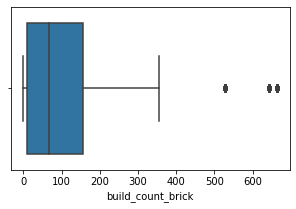

In [151]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['build_count_brick'])
plt.show()

In [152]:
data.loc[data['build_count_brick']>500,['sub_area','build_count_brick']]

,sub_area,build_count_brick
929,Tverskoe,529.0
948,Tverskoe,529.0
955,Basmannoe,643.0
1018,Basmannoe,643.0
1111,Presnenskoe,664.0
...,...,...
30406,Presnenskoe,664.0
30440,Basmannoe,643.0
30441,Tverskoe,529.0
30465,Tverskoe,529.0


In [153]:
gp = data.groupby('sub_area')['build_count_brick'].mean()
gp

sub_area
Ajeroport              256.0
Akademicheskoe         205.0
Alekseevskoe           160.0
Altuf'evskoe            47.0
Arbat                  228.0
                       ...  
Vostochnoe Degunino      2.0
Vyhino-Zhulebino        38.0
Zamoskvorech'e         301.0
Zapadnoe Degunino       28.0
Zjuzino                 45.0
Name: build_count_brick, Length: 138, dtype: float64

In [154]:
gp.isnull().sum()

15

In [155]:
# build_count_1921-1945
gp = data.groupby('sub_area')['raion_build_count_with_builddate_info'].mean()
gp


sub_area
Ajeroport              332.0
Akademicheskoe         374.0
Alekseevskoe           248.0
Altuf'evskoe           119.0
Arbat                  251.0
                       ...  
Vostochnoe Degunino    159.0
Vyhino-Zhulebino       566.0
Zamoskvorech'e         375.0
Zapadnoe Degunino      213.0
Zjuzino                400.0
Name: raion_build_count_with_builddate_info, Length: 138, dtype: float64

In [156]:
gp.isnull().sum()

15

In [157]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']<20) & (missing_values_new['Null Value Percentage']>17)]
miss_col

,Columns Name,Null Value Percentage
build_count_brick,build_count_brick,17.238362
build_count_monolith,build_count_monolith,17.238362
build_count_1921-1945,build_count_1921-1945,17.238362
build_count_1946-1970,build_count_1946-1970,17.238362
build_count_1971-1995,build_count_1971-1995,17.238362
build_count_frame,build_count_frame,17.238362
build_count_after_1995,build_count_after_1995,17.238362
build_count_mix,build_count_mix,17.238362
build_count_wood,build_count_wood,17.238362
build_count_slag,build_count_slag,17.238362


In [158]:
miss_lt = miss_col['Columns Name'].unique()
miss_lt

array(['build_count_brick', 'build_count_monolith',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_frame',
       'build_count_after_1995', 'build_count_mix', 'build_count_wood',
       'build_count_slag', 'build_count_foam',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_panel', 'build_count_block',
       'raion_build_count_with_material_info'], dtype=object)

In [159]:
gp = data.groupby('sub_area')[miss_lt].mean()
gp

,build_count_brick,build_count_monolith,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_frame,build_count_after_1995,build_count_mix,build_count_wood,build_count_slag,build_count_foam,raion_build_count_with_builddate_info,build_count_before_1920,build_count_panel,build_count_block,raion_build_count_with_material_info
sub_area,,,,,,,,,,,,,,,,
Ajeroport,256.0,12.0,25.0,246.0,39.0,0.0,20.0,0.0,2.0,1.0,0.0,332.0,2.0,30.0,31.0,332.0
Akademicheskoe,205.0,9.0,0.0,304.0,21.0,0.0,49.0,0.0,0.0,1.0,0.0,374.0,0.0,78.0,81.0,374.0
Alekseevskoe,160.0,0.0,17.0,186.0,40.0,0.0,5.0,0.0,0.0,0.0,0.0,248.0,0.0,18.0,72.0,250.0
Altuf'evskoe,47.0,1.0,0.0,72.0,42.0,0.0,5.0,0.0,0.0,0.0,0.0,119.0,0.0,47.0,24.0,119.0
Arbat,228.0,12.0,26.0,30.0,15.0,0.0,24.0,1.0,0.0,0.0,0.0,251.0,156.0,7.0,3.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vostochnoe Degunino,2.0,7.0,0.0,1.0,134.0,0.0,24.0,0.0,0.0,0.0,0.0,159.0,0.0,111.0,39.0,159.0
Vyhino-Zhulebino,38.0,8.0,54.0,203.0,210.0,5.0,94.0,1.0,81.0,2.0,0.0,566.0,5.0,320.0,112.0,567.0
Zamoskvorech'e,301.0,14.0,73.0,105.0,23.0,8.0,35.0,0.0,14.0,0.0,0.0,375.0,139.0,13.0,27.0,377.0


In [160]:
gp[gp.isnull()]

,build_count_brick,build_count_monolith,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_frame,build_count_after_1995,build_count_mix,build_count_wood,build_count_slag,build_count_foam,raion_build_count_with_builddate_info,build_count_before_1920,build_count_panel,build_count_block,raion_build_count_with_material_info
sub_area,,,,,,,,,,,,,,,,
Ajeroport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akademicheskoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alekseevskoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altuf'evskoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arbat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vostochnoe Degunino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vyhino-Zhulebino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zamoskvorech'e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
gp.isnull().sum()

build_count_brick                        15
build_count_monolith                     15
build_count_1921-1945                    15
build_count_1946-1970                    15
build_count_1971-1995                    15
build_count_frame                        15
build_count_after_1995                   15
build_count_mix                          15
build_count_wood                         15
build_count_slag                         15
build_count_foam                         15
raion_build_count_with_builddate_info    15
build_count_before_1920                  15
build_count_panel                        15
build_count_block                        15
raion_build_count_with_material_info     15
dtype: int64

In [162]:
gp.fillna(gp.mean(),inplace=True)

In [163]:
gp_col = gp.columns
gp_col

Index(['build_count_brick', 'build_count_monolith', 'build_count_1921-1945',
       'build_count_1946-1970', 'build_count_1971-1995', 'build_count_frame',
       'build_count_after_1995', 'build_count_mix', 'build_count_wood',
       'build_count_slag', 'build_count_foam',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_panel', 'build_count_block',
       'raion_build_count_with_material_info'],
      dtype='object')

In [164]:
lst = ['build_count_brick', 'build_count_monolith', 'build_count_1921-1945',
       'build_count_1946-1970', 'build_count_1971-1995', 'build_count_frame',
       'build_count_after_1995', 'build_count_mix', 'build_count_wood',
       'build_count_slag', 'build_count_foam',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_panel', 'build_count_block',
       'raion_build_count_with_material_info']

In [165]:
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    for j in lst:
        data.loc[(data['sub_area'] == i) & (data[j].isnull()),j] = gp.loc[i,j]
    
data[lst].isnull().sum()   

build_count_brick                        0
build_count_monolith                     0
build_count_1921-1945                    0
build_count_1946-1970                    0
build_count_1971-1995                    0
build_count_frame                        0
build_count_after_1995                   0
build_count_mix                          0
build_count_wood                         0
build_count_slag                         0
build_count_foam                         0
raion_build_count_with_builddate_info    0
build_count_before_1920                  0
build_count_panel                        0
build_count_block                        0
raion_build_count_with_material_info     0
dtype: int64

In [166]:
#[data[data[lst].isna()]]

In [167]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>15)]
miss_col

,Columns Name,Null Value Percentage
modern_education_share,modern_education_share,16.100805
old_education_build_share,old_education_build_share,16.100805


In [168]:
print('modern_education_share',data['modern_education_share'].unique())
print('old_education_build_share',data['old_education_build_share'].unique())

modern_education_share [nan '90,92' '93,08' '954,918']
old_education_build_share [nan '23,14' '25,47' '82,517']


In [169]:
# will drop feature as its with bad data
data.drop(['modern_education_share','old_education_build_share'],axis=1,inplace=True)

In [170]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>12)]
miss_col

,Columns Name,Null Value Percentage
cafe_avg_price_1500,cafe_avg_price_1500,14.497725
cafe_sum_1500_max_price_avg,cafe_sum_1500_max_price_avg,14.497725
cafe_sum_1500_min_price_avg,cafe_sum_1500_min_price_avg,14.497725


In [171]:
miss_lt = miss_col['Columns Name'].unique()
miss_lt

array(['cafe_avg_price_1500', 'cafe_sum_1500_max_price_avg',
       'cafe_sum_1500_min_price_avg'], dtype=object)

In [172]:
gp = data.groupby('sub_area')[miss_lt].mean()
gp

,cafe_avg_price_1500,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg
sub_area,,,
Ajeroport,977.530000,1219.201795,735.857009
Akademicheskoe,1093.279126,1363.988981,822.569854
Alekseevskoe,1137.625464,1434.362371,840.888557
Altuf'evskoe,1009.188769,1273.142923,745.232769
Arbat,1300.433333,1614.987333,985.882000
...,...,...,...
Vostochnoe Degunino,1160.762832,1442.408584,879.118053
Vyhino-Zhulebino,1127.554883,1397.969297,857.139102
Zamoskvorech'e,1099.612917,1369.652292,829.574167


In [173]:
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    data.loc[(data['sub_area'] == i) & (data.cafe_avg_price_1500.isnull()),'cafe_avg_price_1500'] = gp.loc[i,'cafe_avg_price_1500']
    data.loc[(data['sub_area'] == i) & (data.cafe_sum_1500_max_price_avg.isnull()),'cafe_sum_1500_max_price_avg'] = gp.loc[i,'cafe_sum_1500_max_price_avg']
    data.loc[(data['sub_area'] == i) & (data.cafe_sum_1500_min_price_avg.isnull()),'cafe_sum_1500_min_price_avg'] = gp.loc[i,'cafe_sum_1500_min_price_avg']

In [174]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>10)]
miss_col

,Columns Name,Null Value Percentage
baths_share,baths_share,11.022051
lodging_sqm_per_cap,lodging_sqm_per_cap,11.022051
perinatal_mort_per_1000_cap,perinatal_mort_per_1000_cap,11.022051
infant_mortarity_per_1000_cap,infant_mortarity_per_1000_cap,11.022051
old_house_share,old_house_share,11.022051
heating_share,heating_share,11.022051
electric_stove_share,electric_stove_share,11.022051
hot_water_share,hot_water_share,11.022051
gas_share,gas_share,11.022051
sewerage_share,sewerage_share,11.022051


In [175]:
data['profitable_enterpr_share'].unique()

array([0.702, 0.685, 0.646,   nan])

In [176]:
for i in miss_col['Columns Name']:
    print(data[i].dtype,i)

float64 baths_share
float64 lodging_sqm_per_cap
float64 perinatal_mort_per_1000_cap
float64 infant_mortarity_per_1000_cap
float64 old_house_share
float64 heating_share
float64 electric_stove_share
float64 hot_water_share
float64 gas_share
float64 sewerage_share
float64 water_pipes_share
float64 housing_fund_sqm
float64 unprofitable_enterpr_share
float64 pop_total_inc
float64 pop_migration
float64 profitable_enterpr_share
float64 invest_fixed_assets_phys
float64 construction_value
float64 divorce_rate
float64 marriages_per_1000_cap
float64 fin_res_per_cap
float64 overdue_wages_per_cap
float64 incidence_population
float64 share_own_revenues
float64 power_clinics
object child_on_acc_pre_school
float64 hospital_beds_available_per_cap
float64 grp_growth
float64 grp
float64 real_dispos_income_per_cap_growth
float64 provision_doctors
float64 hospital_bed_occupancy_per_year
float64 population_reg_sports_share
float64 apartment_build


In [177]:
data['child_on_acc_pre_school'].unique()

array(['7,311', '3,013', '16,765', nan], dtype=object)

In [178]:
#drop feature child_on_acc_pre_school as its has bad data
data.drop('child_on_acc_pre_school',axis=1,inplace=True)

In [182]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>10)]
miss_col

,Columns Name,Null Value Percentage
baths_share,baths_share,11.022051
lodging_sqm_per_cap,lodging_sqm_per_cap,11.022051
perinatal_mort_per_1000_cap,perinatal_mort_per_1000_cap,11.022051
infant_mortarity_per_1000_cap,infant_mortarity_per_1000_cap,11.022051
old_house_share,old_house_share,11.022051
heating_share,heating_share,11.022051
electric_stove_share,electric_stove_share,11.022051
hot_water_share,hot_water_share,11.022051
gas_share,gas_share,11.022051
sewerage_share,sewerage_share,11.022051


In [183]:
miss_lt = miss_col['Columns Name'].unique()
miss_lt

array(['baths_share', 'lodging_sqm_per_cap',
       'perinatal_mort_per_1000_cap', 'infant_mortarity_per_1000_cap',
       'old_house_share', 'heating_share', 'electric_stove_share',
       'hot_water_share', 'gas_share', 'sewerage_share',
       'water_pipes_share', 'housing_fund_sqm',
       'unprofitable_enterpr_share', 'pop_total_inc', 'pop_migration',
       'profitable_enterpr_share', 'invest_fixed_assets_phys',
       'construction_value', 'divorce_rate', 'marriages_per_1000_cap',
       'fin_res_per_cap', 'overdue_wages_per_cap', 'incidence_population',
       'share_own_revenues', 'power_clinics',
       'population_reg_sports_share', 'hospital_beds_available_per_cap',
       'grp_growth', 'grp', 'real_dispos_income_per_cap_growth',
       'provision_doctors', 'hospital_bed_occupancy_per_year',
       'apartment_build'], dtype=object)

In [184]:
gp = data.groupby('sub_area')[miss_lt].median()  #agg(pd.Series.mode)
gp

,baths_share,lodging_sqm_per_cap,perinatal_mort_per_1000_cap,infant_mortarity_per_1000_cap,old_house_share,heating_share,electric_stove_share,hot_water_share,gas_share,sewerage_share,...,share_own_revenues,power_clinics,population_reg_sports_share,hospital_beds_available_per_cap,grp_growth,grp,real_dispos_income_per_cap_growth,provision_doctors,hospital_bed_occupancy_per_year,apartment_build
sub_area,,,,,,,,,,,,,,,,,,,,,
Ajeroport,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0
Akademicheskoe,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0
Alekseevskoe,98.6,19.243475,8.82,7.6,0.4,99.3,54.5,94.3,43.6,98.0,...,0.969794,121.1,26.7,772.0,0.084104,11814.8974,-0.025,65.2,293.0,46080.0
Altuf'evskoe,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0
Arbat,98.6,19.243475,8.82,7.6,0.4,99.3,54.5,94.3,43.6,98.0,...,0.969794,121.1,26.7,772.0,0.084104,11814.8974,-0.025,65.2,293.0,46080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vostochnoe Degunino,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0
Vyhino-Zhulebino,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0
Zamoskvorech'e,98.6,19.185046,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707.0,0.084104,12808.5734,-0.079,61.0,286.0,46080.0


In [185]:
gp1 = data.groupby('sub_area')[miss_lt].agg(pd.Series.mode)
gp1

,baths_share,lodging_sqm_per_cap,perinatal_mort_per_1000_cap,infant_mortarity_per_1000_cap,old_house_share,heating_share,electric_stove_share,hot_water_share,gas_share,sewerage_share,...,share_own_revenues,power_clinics,population_reg_sports_share,hospital_beds_available_per_cap,grp_growth,grp,real_dispos_income_per_cap_growth,provision_doctors,hospital_bed_occupancy_per_year,apartment_build
sub_area,,,,,,,,,,,,,,,,,,,,,
Ajeroport,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Akademicheskoe,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Alekseevskoe,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Altuf'evskoe,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Arbat,98.6,"[19.1850455, 19.24347539]","[7.61, 8.82]","[6.1, 7.6]",0.4,99.3,"[54.5, 55.2]",94.3,"[43.3, 43.6]",98,...,"[0.969793753, 0.977828439]","[41.9, 121.1]","[26.7, 28.2]","[707.0, 772.0]","[0.08410365, 0.107625465]","[11814.8974, 12808.5734]","[-0.079, 0.054000000000000006]","[61.0, 65.2]","[286.0, 293.0]","[46080.0, 46352.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vostochnoe Degunino,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Vyhino-Zhulebino,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080
Zamoskvorech'e,98.6,19.185,7.61,6.1,0.4,99.3,55.2,94.3,43.3,98.1,...,0.977828,41.9,28.2,707,0.0841037,12808.6,-0.079,61,286,46080


In [186]:
lst = gp.columns

In [187]:
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    for j in lst:
        data.loc[(data['sub_area'] == i) & (data[j].isnull()),j] = gp.loc[i,j]
    


In [188]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>0)]
miss_col

,Columns Name,Null Value Percentage
cafe_sum_1500_min_price_avg,cafe_sum_1500_min_price_avg,3.087154
cafe_avg_price_1500,cafe_avg_price_1500,3.087154
cafe_sum_1500_max_price_avg,cafe_sum_1500_max_price_avg,3.087154
state,state,0.003500


In [189]:
data[data.state.isnull()]

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_bed_occupancy_per_year,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
10824,10824,10827,2013-09-30,43.0,27.0,1.0,5.0,1.0,1976.0,2.0,...,293.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3


In [190]:
data.drop(10824,inplace=True)

In [191]:
missing_values_new = null_value() 
miss_col = missing_values_new.loc[(missing_values_new['Null Value Percentage']>0)]
miss_col

,Columns Name,Null Value Percentage
cafe_sum_1500_min_price_avg,cafe_sum_1500_min_price_avg,3.083762
cafe_avg_price_1500,cafe_avg_price_1500,3.083762
cafe_sum_1500_max_price_avg,cafe_sum_1500_max_price_avg,3.083762


In [192]:
miss_lt = miss_col['Columns Name'].unique()
miss_lt

array(['cafe_sum_1500_min_price_avg', 'cafe_avg_price_1500',
       'cafe_sum_1500_max_price_avg'], dtype=object)

In [193]:
data.cafe_sum_1500_max_price_avg.nunique()

1606

In [194]:
data.cafe_sum_1500_min_price_avg.dtype

dtype('float64')

In [195]:
gp = data.groupby('sub_area')[miss_lt].mean()
gp

,cafe_sum_1500_min_price_avg,cafe_avg_price_1500,cafe_sum_1500_max_price_avg
sub_area,,,
Ajeroport,735.857009,977.530000,1219.201795
Akademicheskoe,822.569854,1093.279126,1363.988981
Alekseevskoe,840.888557,1137.625464,1434.362371
Altuf'evskoe,745.232769,1009.188769,1273.142923
Arbat,985.882000,1300.433333,1614.987333
...,...,...,...
Vostochnoe Degunino,879.118053,1160.762832,1442.408584
Vyhino-Zhulebino,857.139102,1127.554883,1397.969297
Zamoskvorech'e,829.574167,1099.612917,1369.652292


In [196]:
gp.isnull().sum()

cafe_sum_1500_min_price_avg    13
cafe_avg_price_1500            13
cafe_sum_1500_max_price_avg    13
dtype: int64

In [197]:
gp.fillna(gp.mean(),inplace=True)

In [198]:
lst = gp.columns
sub_area_lt = data.sub_area.unique()
for i in sub_area_lt:
    for j in lst:
        data.loc[(data['sub_area'] == i) & (data[j].isnull()),j] = gp.loc[i,j]

In [199]:
data.isnull().sum().sum()

0

In [200]:
data.head(2)

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,hospital_bed_occupancy_per_year,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
753,753,754,2012-01-10,38.0,19.0,16.0,17.0,1.0,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2
754,754,755,2012-01-10,56.0,56.0,2.0,9.0,1.0,1980.0,2.0,...,298.0,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2


In [201]:
# New features

In [202]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month

In [203]:
data.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [204]:
data.drop(['timestamp'],axis=1,inplace=True)


###  Dimensionality Reduction

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Identify Highly Correlated Features

In [206]:
df = data.drop('price_doc',axis=1)

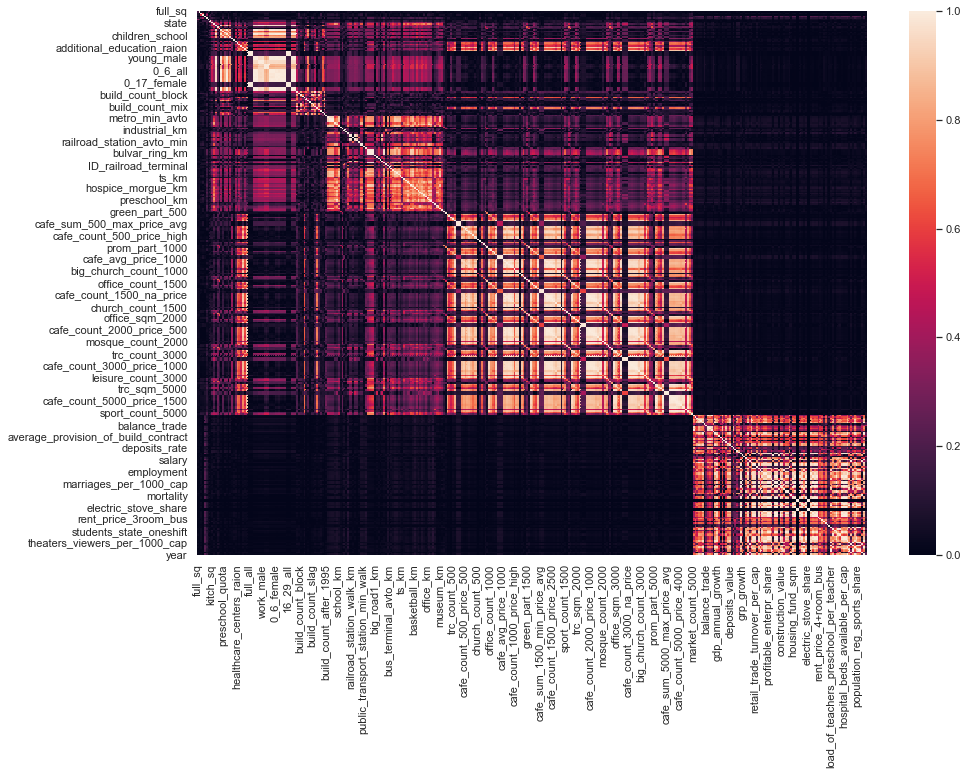

In [207]:
corr_matrix = df.corr().abs()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix)

In [208]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [209]:
to_drop

['children_preschool',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'build_count_slag',
 'raion_build_count_with_builddate_info',
 'build_count_1921-1945',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'park_km',
 'railroad_station_walk_min',
 'railroad_station_avto_km',
 'public_transport_station_min_walk',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'zd_vokzaly_avto_km',
 'radiation_km',
 'power_transmission_line_km',
 'thermal_power_plant_km',
 'stadium_km',
 'basketball_km',
 'public_healthcare_km',
 'preschool_km',
 'big_church_km',
 'museum_km',
 'exhibition_km',
 'cafe

In [210]:
# Drop features
data.drop(to_drop,axis=1,inplace=True)

In [211]:
data.shape

(28569, 175)

### Using VIF

In [212]:
X=add_constant(data.select_dtypes(exclude=['object']))
X.head()

C:\Users\DS7_CSepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,mortality,water_pipes_share,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,month
753,38.0,19.0,16.0,17.0,1.0,1980.0,2.0,6.0,2.0,5.234028e+06,...,9.9,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
754,56.0,56.0,2.0,9.0,1.0,1980.0,2.0,6.0,2.0,1.050803e+07,...,9.9,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
755,53.0,32.0,16.0,17.0,1.0,1980.0,2.0,6.0,3.0,2.481385e+07,...,9.9,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
756,72.0,38.0,29.0,44.0,1.0,1980.0,2.0,6.0,2.0,8.659075e+06,...,9.9,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
757,47.0,30.0,10.0,16.0,1.0,1980.0,2.0,6.0,2.0,3.294352e+06,...,9.9,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1


In [213]:
VIF = pd.Series([variance_inflation_factor(X.values, i)
         for i in range(X.shape[1])],
          index=X.columns)

C:\Users\DS7_CSepuri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [217]:
VIF.iloc[149:]

unemployment                      inf
mortality                         inf
water_pipes_share        8.425063e-09
rent_price_4+room_bus    4.261887e+00
rent_price_3room_bus     7.248733e+00
rent_price_2room_bus     1.809205e+01
rent_price_1room_bus     1.420109e+01
rent_price_3room_eco     1.546676e+01
rent_price_2room_eco     1.445712e+00
rent_price_1room_eco     1.705359e+00
month                    2.623530e+00
dtype: float64

In [218]:
# drop feature with inf varance
data.drop(['salary_growth','retail_trade_turnover_growth','unemployment','mortality'],axis=1,inplace=True)

In [219]:
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,real_dispos_income_per_cap_growth,water_pipes_share,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,month
753,38.0,19.0,16.0,17.0,1.0,1980.0,2.0,6.0,2.0,Investment,...,-0.025,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
754,56.0,56.0,2.0,9.0,1.0,1980.0,2.0,6.0,2.0,Investment,...,-0.025,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
755,53.0,32.0,16.0,17.0,1.0,1980.0,2.0,6.0,3.0,Investment,...,-0.025,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
756,72.0,38.0,29.0,44.0,1.0,1980.0,2.0,6.0,2.0,OwnerOccupier,...,-0.025,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1
757,47.0,30.0,10.0,16.0,1.0,1980.0,2.0,6.0,2.0,Investment,...,-0.025,98.8,153.86,97.07,69.15,51.77,47.19,41.19,32.69,1


In [220]:
data.select_dtypes(include=['object'])

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
753,Investment,Alekseevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,poor
754,Investment,Timirjazevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,poor
755,Investment,Jasenevo,no,no,no,no,yes,no,no,no,no,no,yes,no,good
756,OwnerOccupier,Bogorodskoe,no,no,no,no,yes,no,no,no,no,no,no,no,poor
757,Investment,Altuf'evskoe,no,no,no,no,yes,no,no,no,no,no,no,no,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [221]:
data.to_csv('Cleaned_data.csv')